## PROJECT-TIME SERIES

### DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller,acf,pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


In [2]:
df=pd.read_excel("DS3_C6_S4_TimeSeries_Sales_Data_Project.xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df=df.set_index(df['Order Date'])
df=df.sort_index()
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512


In [5]:
df.tail(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,,
2017-12-30,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176


In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

### FURNINTURE:

In [9]:
df_f=df[df['Category']=='Furniture'].loc[:,['Sales']]
df_f.head()
df1=df_f.resample("MS").sum()
df1.head()


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


In [10]:
df1.shape

(48, 1)

### OFFICE SUPPLY: 

In [11]:
df_o=df[df['Category']=='Office Supplies'].loc[:,['Sales']]
df_o.head()
df2=df_o.resample("MS").sum()
df2.head()

,Sales
Order Date,
2014-01-01,4851.080
2014-02-01,1071.724
2014-03-01,8605.879
2014-04-01,11155.074
2014-05-01,7135.624


In [12]:
df2.shape

(48, 1)

### TECHNOLOGY:

In [13]:
df_t=df[df['Category']=='Technology'].loc[:,['Sales']]
df_t.head()
df3=df_t.resample("MS").sum()
df3.head()

,Sales
Order Date,
2014-01-01,3143.290
2014-02-01,1608.510
2014-03-01,32511.174
2014-04-01,9195.434
2014-05-01,9599.876


In [14]:
df3.shape

(48, 1)

# EDA:

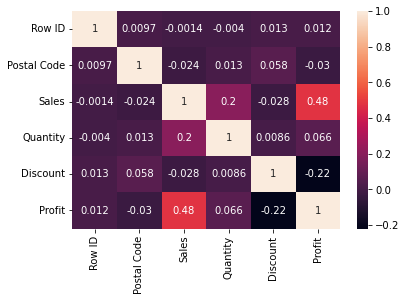

In [15]:
sns.heatmap(df.corr(),annot=True);

In [16]:
num=df.select_dtypes(exclude='object')
num.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Postal Code', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [17]:
cat=df.select_dtypes(include='object')
cat.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object')

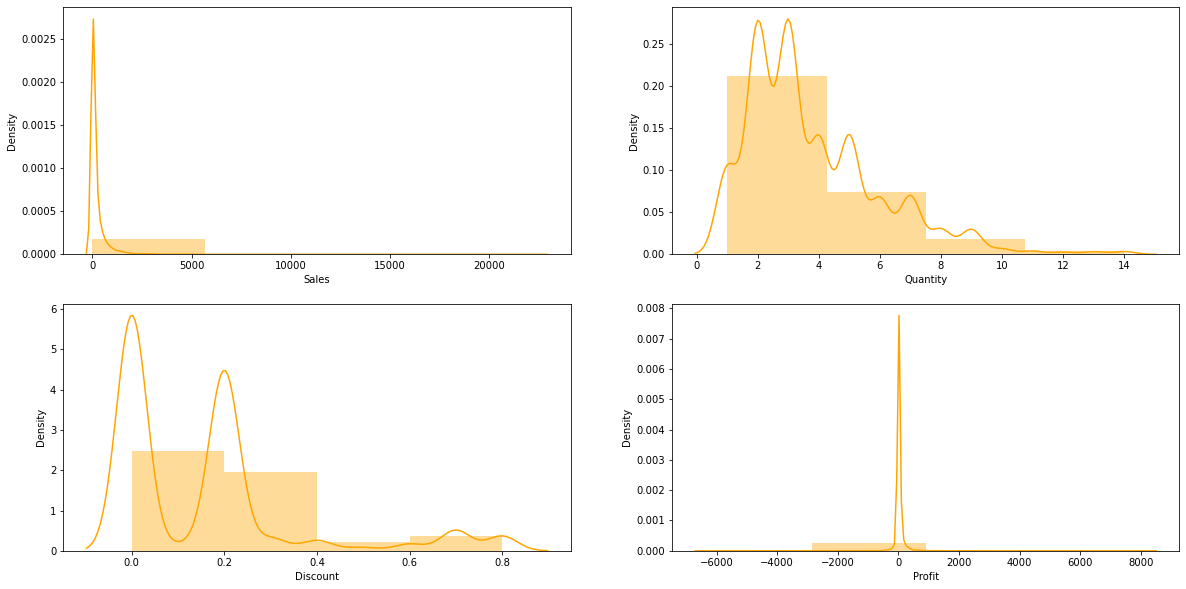

In [18]:
col=['Sales', 'Quantity','Discount', 'Profit']
fig,ax=plt.subplots(2,2,figsize=(20,10))
for i,j in zip(col,ax.flatten()):
    sns.distplot(df[i],ax=j,color='orange',bins=4);

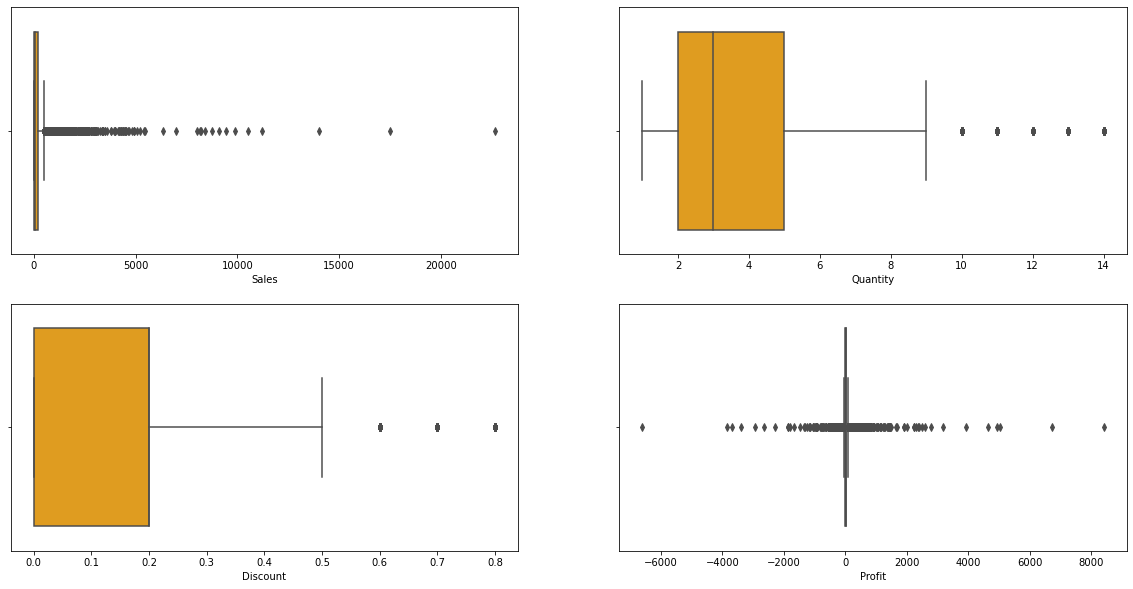

In [19]:
col=['Sales', 'Quantity','Discount', 'Profit']
fig,ax=plt.subplots(2,2,figsize=(20,10))
for i,j in zip(col,ax.flatten()):
    sns.boxplot(df[i],ax=j,color='orange');

##### INTERETATION: 
- SALES: MOST OF THE SALE IS LYING BETWEEN 0-5000,WITH MANY OUTLIERS.
- QUANTITY: MOST OF THE QUANTITY IS LYING BETWEEN 2-5,WITH FEW OUTLIERS.
- DISCOUNT: DISCOUNT IS LYING MOSTLY IN 0.0 TO 0.2(0-20%) RANGE.
- PROFIT: PROFIT IS SHOWING BOTH NEGATIVE AND POSITIVE VALUES ALMOST EQUALLY

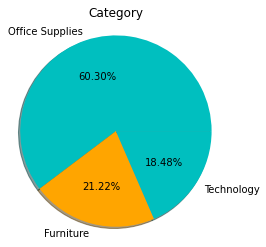

In [20]:
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().keys(),autopct='%0.2f%%',colors=('c','orange'),shadow=True,radius=1.1);
plt.title("Category");

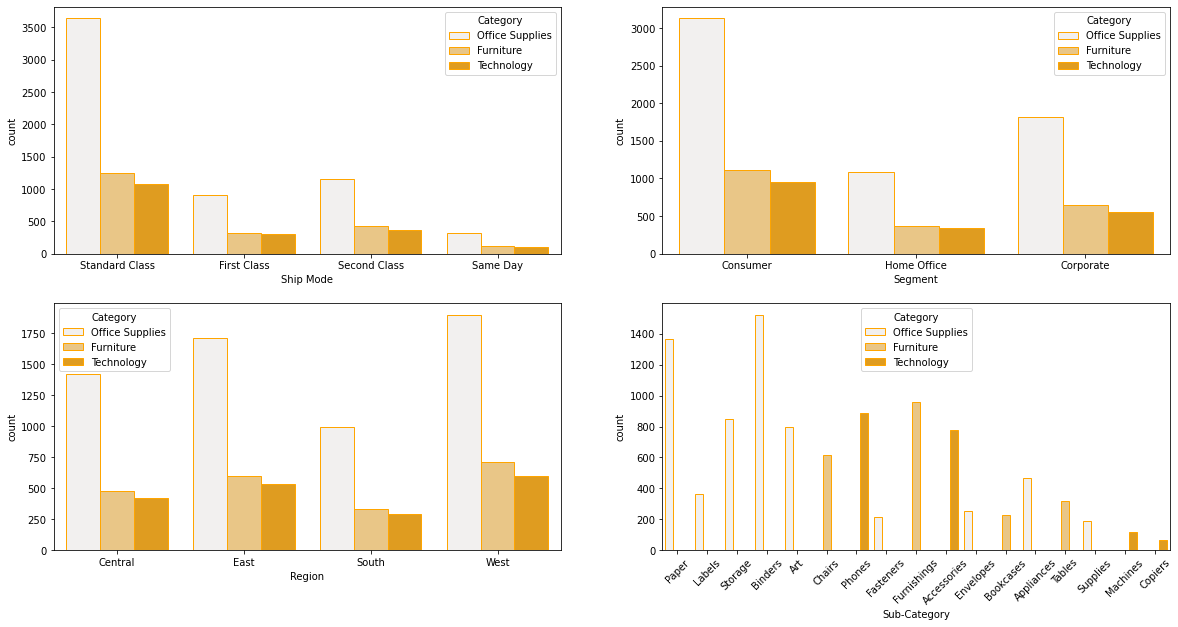

In [21]:
col=['Ship Mode','Segment','Region','Sub-Category']
fig,ax=plt.subplots(2,2,figsize=(20,10))
for i,j in zip(col,ax.flatten()):
    sns.countplot(df[i],ax=j,color='orange',hue=df['Category'],edgecolor='orange');
    plt.xticks(rotation=45)

##### INTERPRETATION: 
- OFFICE SUPPLIES ARE HAVING HIGHEST PROPORTION AS 60.30% .
-  STANDARD CLASS ARE HAVING HIGHEST COUNT OF SHIPMODE FOR EACH CATEGORY.
-  WEST REGION IS HAVING HIGHEST COUNT FOR EACH CATEGORY i.e., FURNITURE,TECHNOLOGY & OFFICE SUPPLIES.
-  TECHNOLOGY IS HAVING COUNT FOR PHONES , ACCESSORIES,MACHINES & COPIERS.
- FURNITURE IS HAVING COUNT FOR CHAIRS,FURNISHINGS,BOOKCASES & TABLES.AND REST ARE FOR THE OFFICE SUPPLIES WHICH IS HAVING MOST OF THE COUNT.

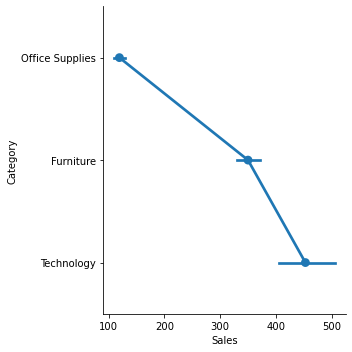

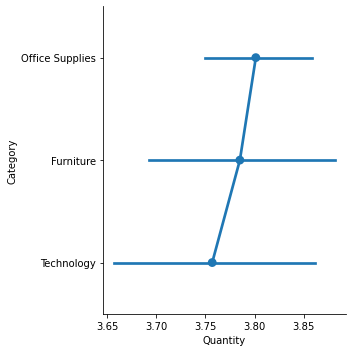

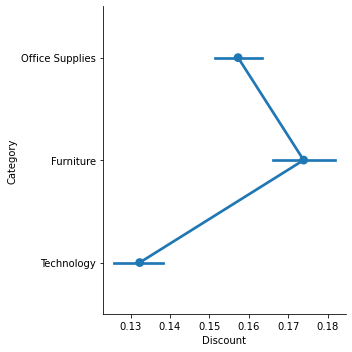

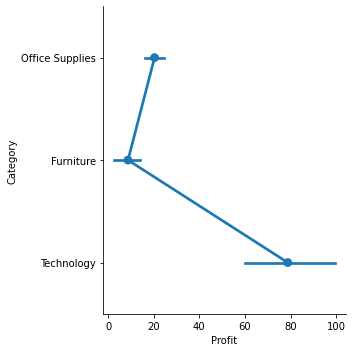

In [22]:
col=['Sales', 'Quantity','Discount', 'Profit']  
sns.catplot(data=df,x='Sales',kind='point',y='Category');
sns.catplot(data=df,x='Quantity',kind='point',y='Category');
sns.catplot(data=df,x='Discount',kind='point',y='Category');
sns.catplot(data=df,x='Profit',kind='point',y='Category');

##### INTERPRETATION:
- TECHNOLOGY IS CONTRIBUTING HIGHEST AMOUNT FOR PROFIT AND SALES.
- FURNITURE IS CONTRIBUTING MORE FOR DISCOUNTS.
- OFFICE SUPPLIES IS CONTRIBUTING MORE FOR QUANTITIES.

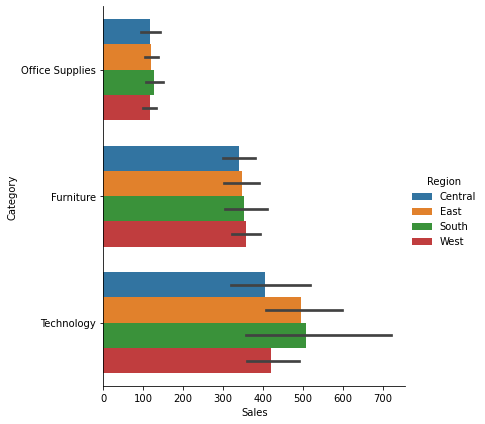

In [23]:
sns.catplot(data=df, kind="bar", x="Sales", y="Category", hue="Region",height=6);

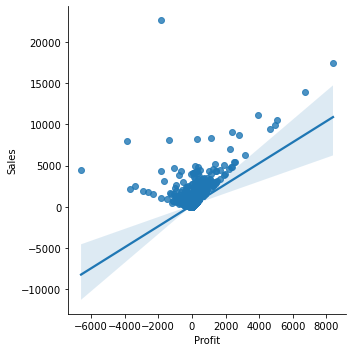

In [24]:
sns.lmplot(data=df,x='Profit',y='Sales');

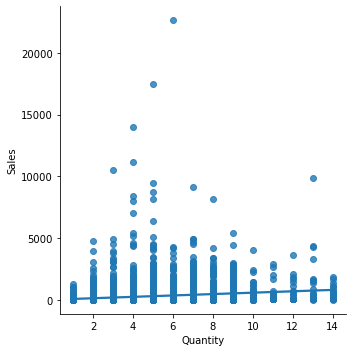

In [25]:
sns.lmplot(data=df,x='Quantity',y='Sales');

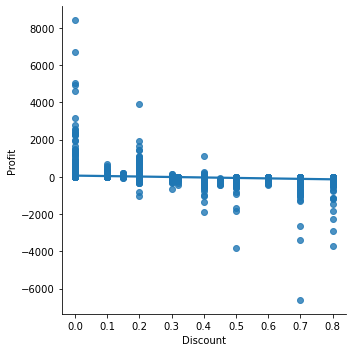

In [26]:
sns.lmplot(data=df,x='Discount',y='Profit');

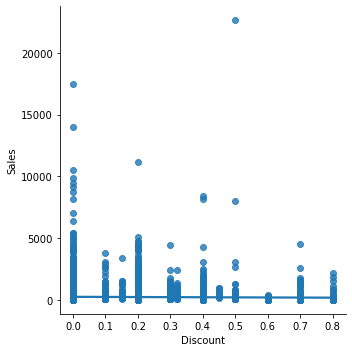

In [27]:
sns.lmplot(data=df,x='Discount',y='Sales');

##### INTERPRETATION:
- TECHNOLOGY IS CONTRIBUTING MOST TO THE SALE AND OFFICE SUPPLIES IS CONTRIBUTING LEAST.
-  PROFIT AND SALES POSITIVELY CORRELATED WITH EACH OTHER i.e., AS SALES INCREASES, PROFIT INCREASES.
-  WITH DISCOUNT OF 0-20% THERE IS PROFIT BUT FOR DISCOUNT GREATER THAN 20% THERE IS A LOSS.

## FOR FURNITURE:

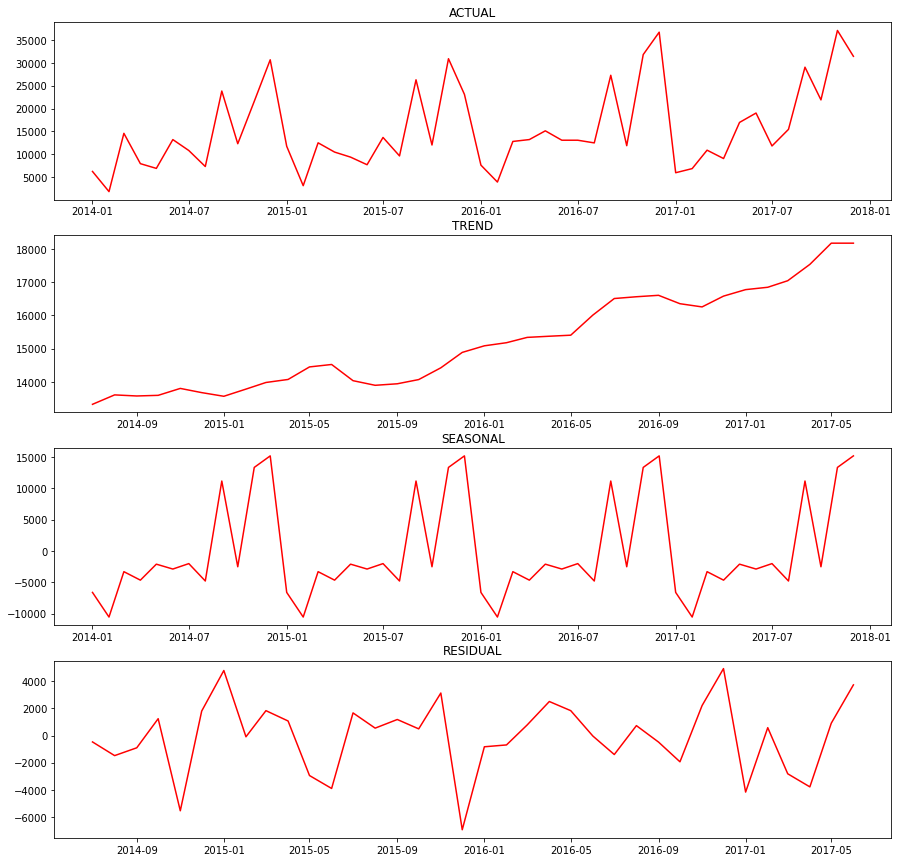

In [28]:
dec=seasonal_decompose(df1,period=12)
dec_trend=dec.trend
dec_ses=dec.seasonal
dec_res=dec.resid
fig,ax=plt.subplots(4,1,figsize=(15,15))
graph=['ACTUAL','TREND','SEASONAL','RESIDUAL']
for i,(j,ax) in enumerate(zip([df1,dec_trend,dec_ses,dec_res],ax.flatten())):
    ax.plot(j,c='r')
    ax.set_title(graph[i])


### CHECK FOR STATIONARITY

In [29]:
def check(data):
    p_val=adfuller(data)[1]
    if p_val<0.05:
        msg=print("DATA IS STATIONARY : P_VALUE IS ======{} ".format(p_val))
    else:
        msg=print("DATA IS NOT STATIONARY : P_VALUE IS ====={} ".format(p_val))

In [30]:
check(df1)

DATA IS STATIONARY : P_VALUE IS ======8.450793985809654e-05 


### TIME SRIES MODEL

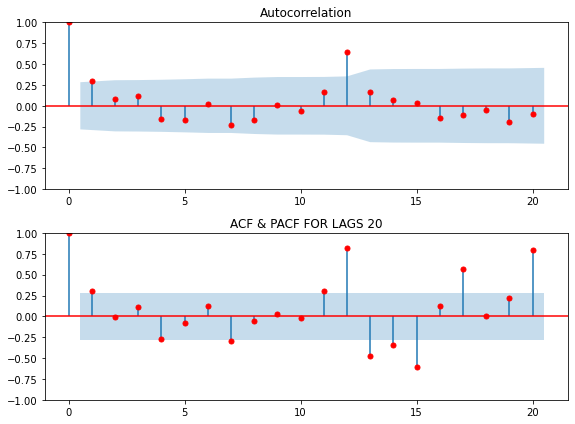

In [31]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df1, lags=20, ax=ax1,c='r')
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df1, lags=20, ax=ax2,c='r')
plt.tight_layout()
plt.title("ACF & PACF FOR LAGS 20");

### ARMA MODEL( AS DATA IS STATIONARY)

In [32]:
data= int(0.8 * len(df1))
train = df1.iloc[:data]
test = df1.iloc[data:]
print("train === {}, test === {}".format(len(train), len(test)))

train === 38, test === 10


In [33]:
for p in range(1,10):
    for q in range(1,3):
            armaf = ARIMA(train,order=(p,0,q))
            armaf_fit = armaf.fit()
            print(p,0,q,'====',armaf_fit.aic)

1 0 1 ==== 802.5188679959884
1 0 2 ==== 803.7816056520917
2 0 1 ==== 804.5110265113555
2 0 2 ==== 805.7445365686808
3 0 1 ==== 806.1209153217055
3 0 2 ==== 807.5940298773003
4 0 1 ==== 804.164197577378
4 0 2 ==== 802.9526146926105
5 0 1 ==== 804.5687885570022
5 0 2 ==== 805.8588973257466
6 0 1 ==== 806.58881117146
6 0 2 ==== 807.6285868748059
7 0 1 ==== 806.711444413004
7 0 2 ==== 804.7413666931609
8 0 1 ==== 808.7639475460778
8 0 2 ==== 809.6344083057401
9 0 1 ==== 809.8250979317397
9 0 2 ==== 805.6720563059197


##### ARMA (1,0,1) is showing least AIC value.

In [34]:
arma_f = ARIMA(train,order=(1,0,1))
arma_f_fit = arma_f.fit()
print(arma_f_fit.aic)

802.5188679959884


In [35]:
def p_value(d):
    p_val=sm.stats.acorr_ljungbox(d.resid,lags=[1],return_df=True)['lb_pvalue'].values
    print(p_val)
    if p_val<0.05:
        print("REJECT H0: BAD MODEL")
    else:
        print("ACCEPT HO: GOOD MODEL")

In [36]:
p_value(arma_f_fit)

[0.98873454]
ACCEPT HO: GOOD MODEL


In [37]:
pred1=arma_f_fit.predict(0,len(test)-1)
print(pred1)

Order Date
2014-01-01    14195.865672
2014-02-01    12776.762027
2014-03-01    12512.568160
2014-04-01    15133.806534
2014-05-01    12464.264927
2014-06-01    13627.514825
2014-07-01    14289.758476
2014-08-01    13471.525012
2014-09-01    13190.806476
2014-10-01    16639.879383
Freq: MS, Name: predicted_mean, dtype: float64


In [38]:
actual=[]
predict=[]
for i in range(len(pred1)):
    actual.append(test['Sales'][i])
    predict.append(pred1[i])
df_fu=pd.DataFrame({"ACTUAL":actual,"PREDICTED":predict})
df_fu['error']=df_fu.ACTUAL-df_fu.PREDICTED
print(df_fu.head())

       ACTUAL     PREDICTED        error
0  10893.4448  14195.865672 -3302.420872
1   9065.9581  12776.762027 -3710.803927
2  16957.5582  12512.568160  4444.990040
3  19008.5867  15133.806534  3874.780166
4  11813.0220  12464.264927  -651.242927


In [39]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(df_fu.ACTUAL, df_fu.PREDICTED)
print("MSE: ",mse1)
rmse1 = mean_squared_error(df_fu.ACTUAL, df_fu.PREDICTED,squared=False)
print("Rmse:",rmse1)

MSE:  113881986.98393583
Rmse: 10671.550355217176


In [40]:
f1=train['Sales'][:].resample('MS').sum()
d1=arma_f_fit.forecast(24)

In [41]:
d1

2017-03-01    14154.033738
2017-04-01    14208.989032
2017-05-01    14191.748659
2017-06-01    14197.157246
2017-07-01    14195.460484
2017-08-01    14195.992786
2017-09-01    14195.825794
2017-10-01    14195.878182
2017-11-01    14195.861747
2017-12-01    14195.866903
2018-01-01    14195.865286
2018-02-01    14195.865793
2018-03-01    14195.865634
2018-04-01    14195.865684
2018-05-01    14195.865668
2018-06-01    14195.865673
2018-07-01    14195.865671
2018-08-01    14195.865672
2018-09-01    14195.865672
2018-10-01    14195.865672
2018-11-01    14195.865672
2018-12-01    14195.865672
2019-01-01    14195.865672
2019-02-01    14195.865672
Freq: MS, Name: predicted_mean, dtype: float64

In [42]:
fore1=pd.concat([f1,d1],axis=0)

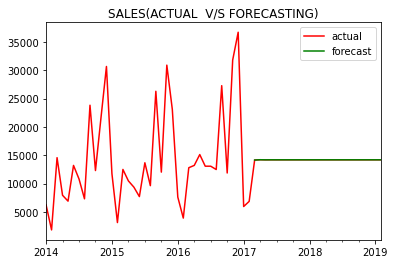

In [43]:
fore1.plot(label="actual",c='r')
d1.plot(label="forecast",c='g')
plt.title("SALES(ACTUAL  V/S FORECASTING)")
plt.legend();

### FOR PROFIT:

In [44]:
df_f2=df[df['Category']=='Furniture'].loc[:,['Profit']]
df_f2.head()
df1_f=df_f2.resample("MS").sum()

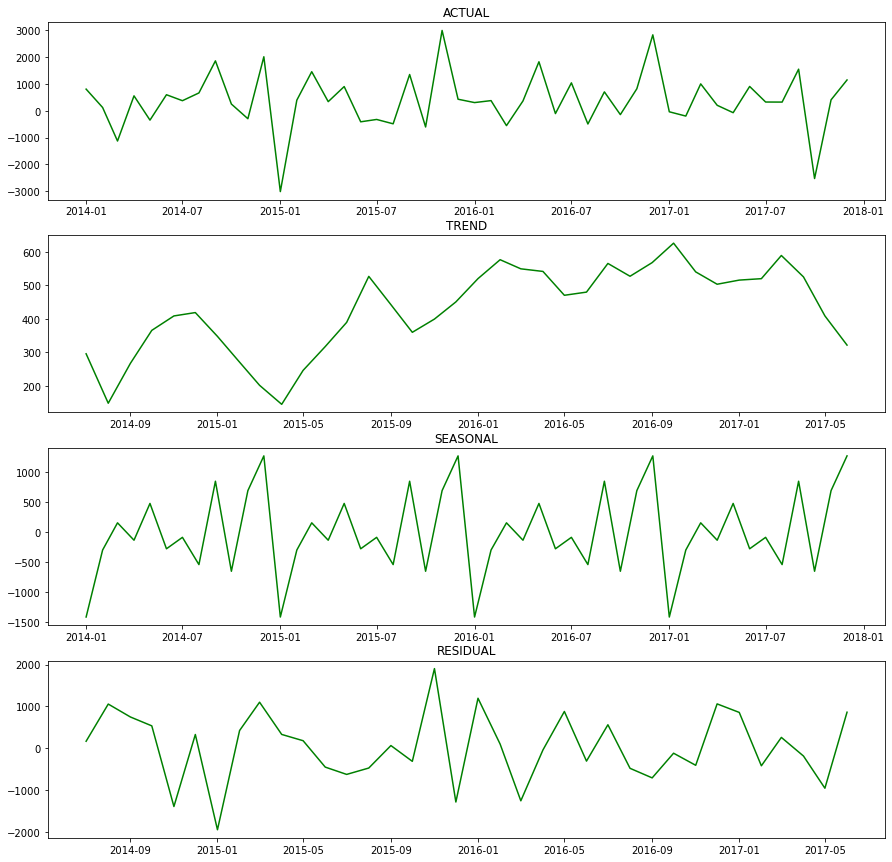

In [45]:
dec=seasonal_decompose(df1_f,period=12)
dec_trend=dec.trend
dec_ses=dec.seasonal
dec_res=dec.resid
fig,ax=plt.subplots(4,1,figsize=(15,15))
graph=['ACTUAL','TREND','SEASONAL','RESIDUAL']
for i,(j,ax) in enumerate(zip([df1_f,dec_trend,dec_ses,dec_res],ax.flatten())):
    ax.plot(j,c='g')
    ax.set_title(graph[i])

In [46]:
check(df1_f)

DATA IS STATIONARY : P_VALUE IS ======1.50557176821076e-05 


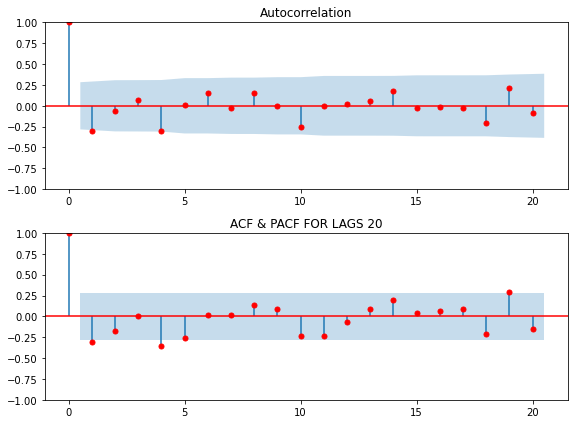

In [47]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df1_f, lags=20, ax=ax1,c='r')
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df1_f, lags=20, ax=ax2,c='r')
plt.tight_layout()
plt.title("ACF & PACF FOR LAGS 20");

### ARMA MODEL( AS DATA IS STATIONARY)

In [48]:
data= int(0.8 * len(df1_f))
train1 = df1_f.iloc[:data]
test1 = df1_f.iloc[data:]
print("train === {}, test === {}".format(len(train1), len(test1)))

train === 38, test === 10


In [49]:
for p in range(1,5):
    for q in range(1,3):
            armaf1 = ARIMA(train1,order=(p,0,q))
            armaf_fit1 = armaf1.fit()
            print(p,0,q,'====',armaf_fit1.aic)

1 0 1 ==== 639.7772498965819
1 0 2 ==== 641.6229699768113
2 0 1 ==== 641.5650803874777
2 0 2 ==== 643.5220642404381
3 0 1 ==== 643.2039908023262
3 0 2 ==== 643.776617151014
4 0 1 ==== 640.3556780917455
4 0 2 ==== 640.3877322523019


##### ARMA (1,0,1) is showing least AIC value.

In [50]:
arma_f1 = ARIMA(train1,order=(1,0,1))
arma_f_fit1 = arma_f1.fit()
print(arma_f_fit1.aic)

639.7772498965819


In [51]:
p_value(arma_f_fit1)

[0.66985499]
ACCEPT HO: GOOD MODEL


In [52]:
pred2=arma_f_fit1.predict(0,len(test1)-1)
print(pred2)

Order Date
2014-01-01    400.077827
2014-02-01    316.714069
2014-03-01    398.185701
2014-04-01    804.440472
2014-05-01    709.172624
2014-06-01    898.113884
2014-07-01    786.800517
2014-08-01    759.440137
2014-09-01    643.018341
2014-10-01    137.672511
Freq: MS, Name: predicted_mean, dtype: float64


In [53]:
actual=[]
predict=[]
for i in range(len(pred2)):
    actual.append(test1['Profit'][i])
    predict.append(pred2[i])
df_fu1=pd.DataFrame({"ACTUAL":actual,"PREDICTED":predict})
df_fu1['error']=df_fu1.ACTUAL-df_fu1.PREDICTED
print(df_fu1.head())

      ACTUAL   PREDICTED       error
0  1000.8532  400.077827  600.775373
1   202.4624  316.714069 -114.251669
2   -72.8829  398.185701 -471.068601
3   904.9956  804.440472  100.555128
4   324.6244  709.172624 -384.548224


In [54]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(df_fu1.ACTUAL, df_fu1.PREDICTED)
print("MSE: ",mse2)
rmse2 = mean_squared_error(df_fu1.ACTUAL, df_fu1.PREDICTED,squared=False)
print("Rmse:",rmse2)

MSE:  1354053.6144181308
Rmse: 1163.6380942621854


In [55]:
f2=train1['Profit'][:].resample('MS').sum()
d2=arma_f_fit1.forecast(12)
fore2=pd.concat([f2,d2],axis=0)

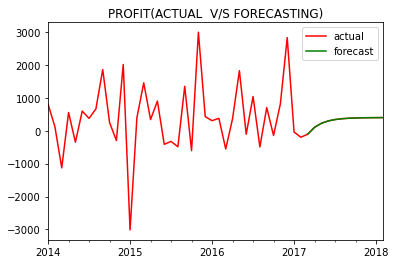

In [56]:
fore2.plot(label="actual",c='r')
d2.plot(label="forecast",c='g')
plt.title("PROFIT(ACTUAL  V/S FORECASTING)")
plt.legend();

# OFFICE SUPPLY

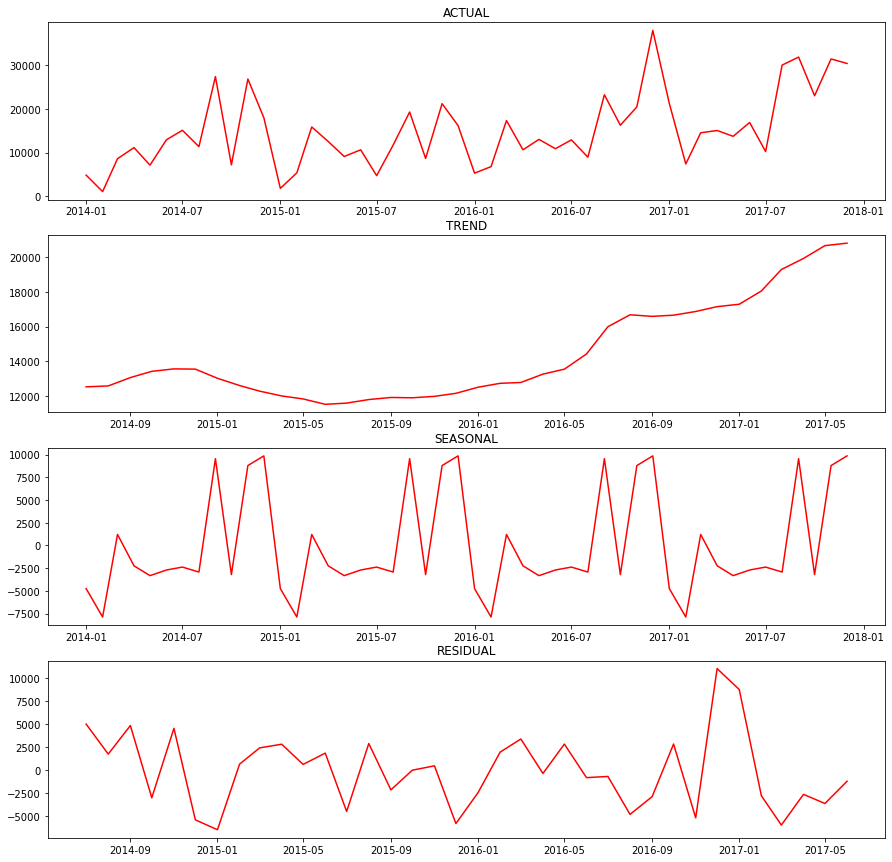

In [57]:
dec=seasonal_decompose(df2,period=12)
dec_trend=dec.trend
dec_ses=dec.seasonal
dec_res=dec.resid
fig,ax=plt.subplots(4,1,figsize=(15,15))
graph=['ACTUAL','TREND','SEASONAL','RESIDUAL']
for i,(j,ax) in enumerate(zip([df2,dec_trend,dec_ses,dec_res],ax.flatten())):
    ax.plot(j,c='r')
    ax.set_title(graph[i])

In [58]:
check(df2)

DATA IS NOT STATIONARY : P_VALUE IS =====0.329487275494728 


In [59]:
diff1 = df2 - df2.shift(1)
print(diff1)

                Sales
Order Date           
2014-01-01        NaN
2014-02-01  -3779.356
2014-03-01   7534.155
2014-04-01   2549.195
2014-05-01  -4019.450
2014-06-01   5817.413
2014-07-01   2168.171
2014-08-01  -3741.746
2014-09-01  16043.836
2014-10-01 -20212.170
2014-11-01  19651.308
2014-12-01  -8855.974
2015-01-01 -16197.682
2015-02-01   3559.287
2015-03-01  10514.480
2015-04-01  -3323.989
2015-05-01  -3444.822
2015-06-01   1534.011
2015-07-01  -5927.808
2015-08-01   7015.169
2015-09-01   7570.659
2015-10-01 -10632.357
2015-11-01  12544.720
2015-12-01  -5016.456
2016-01-01 -10901.992
2016-02-01   1494.668
2016-03-01  10552.581
2016-04-01  -6699.484
2016-05-01   2387.755
2016-06-01  -2133.392
2016-07-01   2022.634
2016-08-01  -3964.704
2016-09-01  14303.998
2016-10-01  -6981.944
2016-11-01   4205.484
2016-12-01  17510.288
2017-01-01 -16723.277
2017-02-01 -13866.517
2017-03-01   7142.514
2017-04-01    521.905
2017-05-01  -1335.227
2017-06-01   3175.075
2017-07-01  -6670.571
2017-08-01

In [60]:
diff1.dropna(inplace = True)

In [61]:
check(diff1)

DATA IS STATIONARY : P_VALUE IS ======0.00042872624590976964 


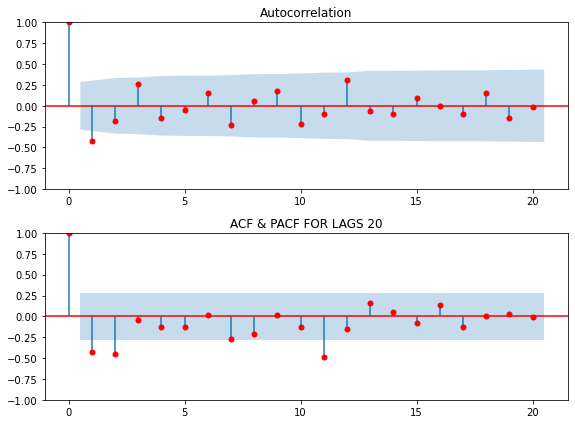

In [62]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(diff1, lags=20, ax=ax1,c='r')
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(diff1, lags=20, ax=ax2,c='r')
plt.tight_layout()
plt.title("ACF & PACF FOR LAGS 20");

## SARIMA MODEL( AS DATA IS NOT STATIONARY)

In [63]:
data= int(0.8 * len(diff1))
train2 = diff1.iloc[:data]
test2 = diff1.iloc[data:]
print("train === {}, test === {}".format(len(train2), len(test2)))

train === 37, test === 10


In [64]:
d=1
for p in range(1,5):
    for q in range(1,2):
            armaf2 = ARIMA(train2,order=(p,d,q))
            armaf_fit2 = armaf2.fit()
            print(p,d,q,'====',armaf_fit2.aic)

1 1 1 ==== 766.5880883796207
2 1 1 ==== 760.163960495745
3 1 1 ==== 762.0278026561803
4 1 1 ==== 767.328066031629


In [65]:
p=2;q=1;d=1
P=1;Q=1;D=1
import statsmodels.api as sm
sarima_model = sm.tsa.statespace.SARIMAX(train2,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   37
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -244.550
Date:                            Thu, 02 Feb 2023   AIC                            501.101
Time:                                    15:25:57   BIC                            508.169
Sample:                                02-01-2014   HQIC                           502.976
                                     - 02-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8222      0.334     -2.464      0.014      -1.476      -0.168
ar.L2         -0.6451      0.403   

In [66]:
p_value(sarima_model)

[0.30064131]
ACCEPT HO: GOOD MODEL


##### INTERPRETATION:
- p=2, q=1 , d=1
- P=1, Q=1 , D=1
- IT IS SHOWING A GOOD ARIMA MODEL

In [67]:
starts=len(train2)
ends= len(train2)+len(test2)-1
print(f"{starts}    {ends}  ")
pred2 = sarima_model.predict(starts,ends)
pred2

37    46  


2017-03-01    28646.159605
2017-04-01    -7789.867783
2017-05-01    -7005.991325
2017-06-01     9995.787998
2017-07-01    -1622.540061
2017-08-01    -3856.776727
2017-09-01    17873.006467
2017-10-01    -9351.687148
2017-11-01     6740.949599
2017-12-01    11585.028448
Freq: MS, Name: predicted_mean, dtype: float64

In [68]:
actual=[]
predict=[]
for i in range(len(pred2)):
    actual.append(test2['Sales'][i])
    predict.append(pred2[i])
df_fu2=pd.DataFrame({"ACTUAL":actual,"PREDICTED":predict})
df_fu2['error']=df_fu2.ACTUAL-df_fu2.PREDICTED
print(df_fu2.head())

     ACTUAL     PREDICTED         error
0  7142.514  28646.159605 -21503.645605
1   521.905  -7789.867783   8311.772783
2 -1335.227  -7005.991325   5670.764325
3  3175.075   9995.787998  -6820.712998
4 -6670.571  -1622.540061  -5048.030939


In [69]:
pred2=sarima_model.predict(0,len(test2)-1)
print(pred2)

Order Date
2014-02-01       0.000000
2014-03-01   -1542.853216
2014-04-01   -1373.095537
2014-05-01   -2413.732669
2014-06-01    5247.078112
2014-07-01    1667.729374
2014-08-01   -1059.329976
2014-09-01    4583.472880
2014-10-01   -3979.941533
2014-11-01    8788.573696
Freq: MS, Name: predicted_mean, dtype: float64


In [70]:
mse3 = mean_squared_error(df_fu2.ACTUAL, df_fu2.PREDICTED)
print("MSE: ",mse3)
rmse3 = mean_squared_error(df_fu2.ACTUAL, df_fu2.PREDICTED,squared=False)
print("Rmse:",rmse3)

MSE:  161574222.25630358
Rmse: 12711.184927311206


In [71]:
f3=train2['Sales'][:].resample('MS').sum()
d3=sarima_model.forecast(24)
fore3=pd.concat([f3,d3],axis=0)
fore3

2014-02-01    -3779.356000
2014-03-01     7534.155000
2014-04-01     2549.195000
2014-05-01    -4019.450000
2014-06-01     5817.413000
                  ...     
2018-10-01    -8259.728740
2018-11-01     7757.357993
2018-12-01    11855.247154
2019-01-01   -13563.108281
2019-02-01    -7164.165096
Freq: MS, Length: 61, dtype: float64

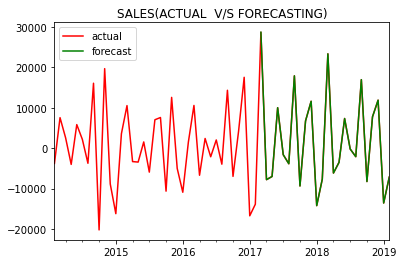

In [72]:
fore3.plot(label="actual",c='r')
d3.plot(label="forecast",c='g')
plt.title("SALES(ACTUAL  V/S FORECASTING)")
plt.legend();

## FOR PROFIT:

In [73]:
df_o2=df[df['Category']=='Office Supplies'].loc[:,['Profit']]
df_o2.head()
df1_o=df_o2.resample("MS").sum()

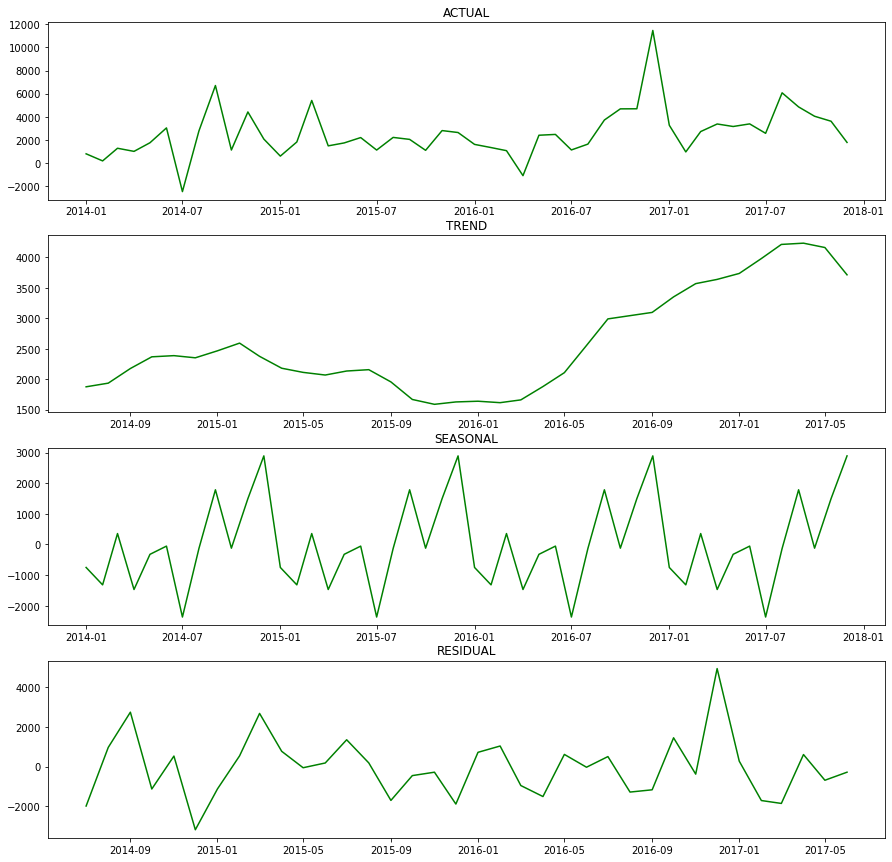

In [74]:
dec=seasonal_decompose(df1_o,period=12)
dec_trend=dec.trend
dec_ses=dec.seasonal
dec_res=dec.resid
fig,ax=plt.subplots(4,1,figsize=(15,15))
graph=['ACTUAL','TREND','SEASONAL','RESIDUAL']
for i,(j,ax) in enumerate(zip([df1_o,dec_trend,dec_ses,dec_res],ax.flatten())):
    ax.plot(j,c='g')
    ax.set_title(graph[i])

In [75]:
check(df1_o)

DATA IS STATIONARY : P_VALUE IS ======5.434298590870671e-06 


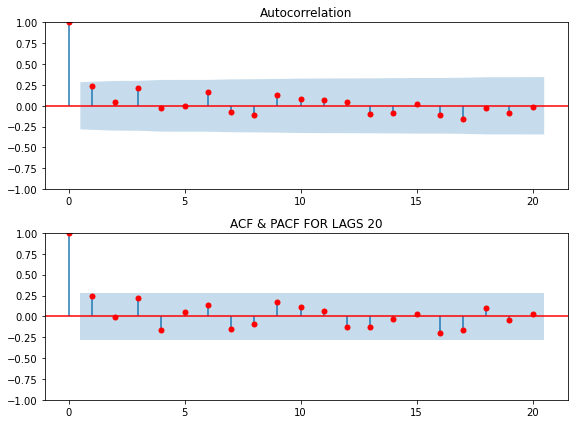

In [76]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df1_o, lags=20, ax=ax1,c='r')
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df1_o, lags=20, ax=ax2,c='r')
plt.tight_layout()
plt.title("ACF & PACF FOR LAGS 20");

### ARMA MODEL( AS DATA IS STATIONARY)

In [77]:
data= int(0.8 * len(df1_o))
train3 = df1_o.iloc[:data]
test3 = df1_o.iloc[data:]
print("train === {}, test === {}".format(len(train3), len(test3)))

train === 38, test === 10


In [78]:
for p in range(1,3):
    for q in range(1,3):
            armaf3 = ARIMA(train3,order=(p,0,q))
            armaf_fit3 = armaf3.fit()
            print(p,0,q,'====',armaf_fit3.aic)

1 0 1 ==== 699.581267333803
1 0 2 ==== 701.5503762952902
2 0 1 ==== 701.43073583513
2 0 2 ==== 702.0008624006821


##### ARMA (1,0,1) is showing least AIC value.

In [79]:
arma_f3 = ARIMA(train3,order=(1,0,1))
arma_f_fit3 = arma_f3.fit()
print(arma_f_fit3.aic)

699.581267333803


In [80]:
p_value(arma_f_fit3)

[0.87837394]
ACCEPT HO: GOOD MODEL


In [81]:
pred3=arma_f_fit3.predict(0,len(test3)-1)
print(pred3)

Order Date
2014-01-01    2292.847801
2014-02-01    2050.392383
2014-03-01    2102.102949
2014-04-01    2248.459389
2014-05-01    2064.505840
2014-06-01    2367.566170
2014-07-01    2389.700105
2014-08-01    1166.381915
2014-09-01    3346.285989
2014-10-01    2385.305485
Freq: MS, Name: predicted_mean, dtype: float64


In [82]:
actual=[]
predict=[]
for i in range(len(pred3)):
    actual.append(test3['Profit'][i])
    predict.append(pred3[i])
df_fu3=pd.DataFrame({"ACTUAL":actual,"PREDICTED":predict})
df_fu3['error']=df_fu3.ACTUAL-df_fu3.PREDICTED
print(df_fu3.head())

      ACTUAL    PREDICTED        error
0  2715.9624  2292.847801   423.114599
1  3370.6015  2050.392383  1320.209117
2  3153.7260  2102.102949  1051.623051
3  3378.9821  2248.459389  1130.522711
4  2563.2845  2064.505840   498.778660


In [83]:
mse4 = mean_squared_error(df_fu3.ACTUAL, df_fu3.PREDICTED)
print("MSE: ",mse4)
rmse4 = mean_squared_error(df_fu3.ACTUAL, df_fu3.PREDICTED,squared=False)
print("Rmse:",rmse4)

MSE:  3299341.126210319
Rmse: 1816.4088543635542


In [84]:
f4=train3['Profit'][:].resample('MS').sum()
d4=arma_f_fit3.forecast(24)
fore4=pd.concat([f4,d4],axis=0)
fore4

2014-01-01     788.950600
2014-02-01     176.091000
2014-03-01    1270.413300
2014-04-01    1000.208600
2014-05-01    1747.204400
                 ...     
2018-10-01    2292.765908
2018-11-01    2292.898651
2018-12-01    2292.816228
2019-01-01    2292.867406
2019-02-01    2292.835628
Freq: MS, Length: 62, dtype: float64

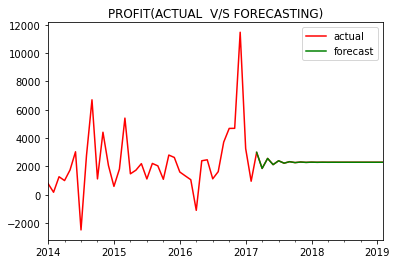

In [85]:
fore4.plot(label="actual",c='r')
d4.plot(label="forecast",c='g')
plt.title("PROFIT(ACTUAL  V/S FORECASTING)")
plt.legend();

## TECHNOLOGY

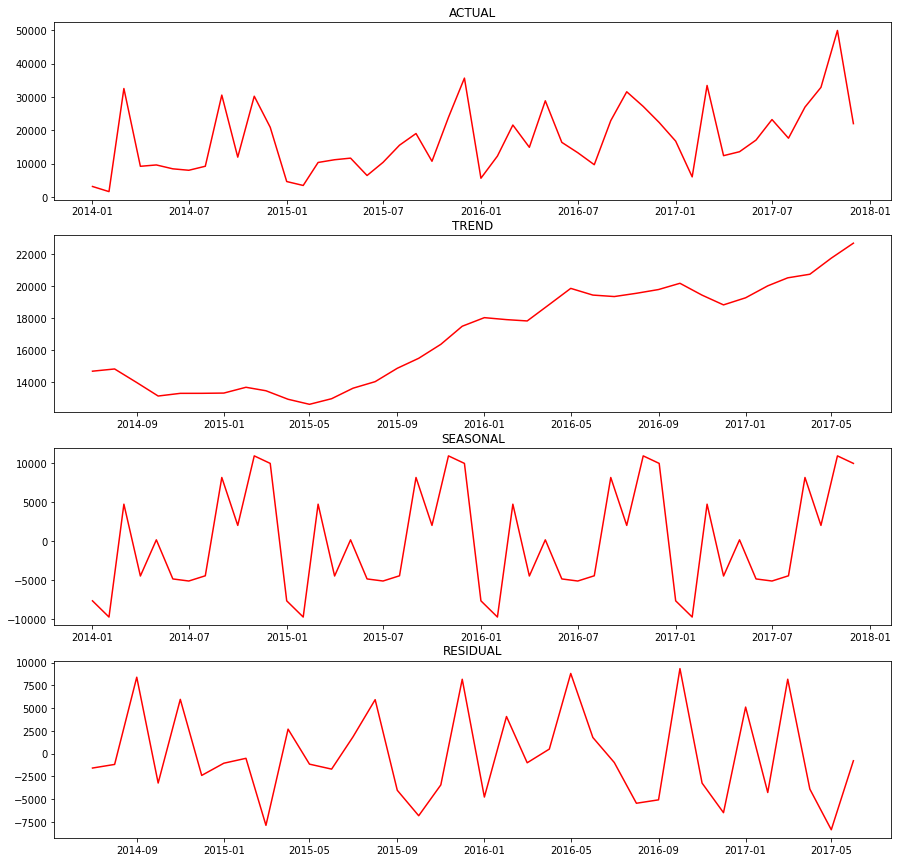

In [86]:
dec=seasonal_decompose(df3,period=12)
dec_trend=dec.trend
dec_ses=dec.seasonal
dec_res=dec.resid
fig,ax=plt.subplots(4,1,figsize=(15,15))
graph=['ACTUAL','TREND','SEASONAL','RESIDUAL']
for i,(j,ax) in enumerate(zip([df3,dec_trend,dec_ses,dec_res],ax.flatten())):
    ax.plot(j,c='r')
    ax.set_title(graph[i])


In [87]:
check(df3)

DATA IS STATIONARY : P_VALUE IS ======1.8615967302063814e-06 


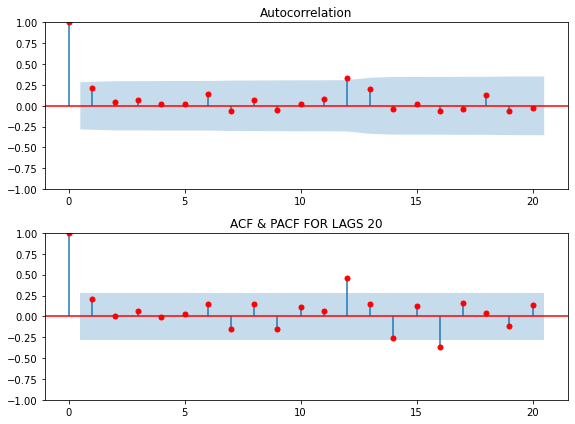

In [88]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df3, lags=20, ax=ax1,c='r')
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df3, lags=20, ax=ax2,c='r')
plt.tight_layout()
plt.title("ACF & PACF FOR LAGS 20");

### ARMA MODEL( AS DATA IS STATIONARY)

In [89]:
data= int(0.8 * len(df3))
train4 = df3.iloc[:data]
test4= df3.iloc[data:]
print("train === {}, test === {}".format(len(train4), len(test4)))

train === 38, test === 10


In [90]:
for p in range(1,5):
    for q in range(1,4):
            armaf4 = ARIMA(train4,order=(p,0,q))
            armaf_fit4 = armaf4.fit()
            print(p,0,q,'====',armaf_fit4.aic)

1 0 1 ==== 809.0759338626159
1 0 2 ==== 810.7175788268578
1 0 3 ==== 813.8787106761433
2 0 1 ==== 811.0431445617629
2 0 2 ==== 812.122028868476
2 0 3 ==== 815.7506214889132
3 0 1 ==== 813.0339554341436
3 0 2 ==== 810.5560490512376
3 0 3 ==== 812.3476768440204
4 0 1 ==== 814.241539493862
4 0 2 ==== 812.5869041473294
4 0 3 ==== 813.8354072968312


##### ARMA (1,0,1) is showing least AIC value.

In [91]:
arma_f4 = ARIMA(train4,order=(1,0,1))
arma_f_fit4 = arma_f4.fit()
print(arma_f_fit4.aic)

809.0759338626159


In [92]:
p_value(arma_f_fit4)

[0.97565898]
ACCEPT HO: GOOD MODEL


In [93]:
pred4=arma_f_fit4.predict(0,len(test4)-1)
print(pred4)

Order Date
2014-01-01    15452.192022
2014-02-01    13717.202868
2014-03-01    14234.114247
2014-04-01    18684.954636
2014-05-01    12854.082862
2014-06-01    15862.897874
2014-07-01    14161.821489
2014-08-01    14955.223064
2014-09-01    14740.078910
2014-10-01    18140.376023
Freq: MS, Name: predicted_mean, dtype: float64


In [94]:
actual=[]
predict=[]
for i in range(len(pred4)):
    actual.append(test4['Sales'][i])
    predict.append(pred4[i])
df_fu4=pd.DataFrame({"ACTUAL":actual,"PREDICTED":predict})
df_fu4['error']=df_fu4.ACTUAL-df_fu4.PREDICTED
print(df_fu4.head())

      ACTUAL     PREDICTED         error
0  33428.622  15452.192022  17976.429978
1  12383.387  13717.202868  -1333.815868
2  13566.588  14234.114247   -667.526247
3  17061.100  18684.954636  -1623.854636
4  23209.926  12854.082862  10355.843138


In [95]:
mse5 = mean_squared_error(df_fu4.ACTUAL, df_fu4.PREDICTED)
print("MSE: ",mse5)
rmse5 = mean_squared_error(df_fu4.ACTUAL, df_fu4.PREDICTED,squared=False)
print("Rmse:",rmse5)

MSE:  217443663.07908744
Rmse: 14745.971079555507


In [96]:
f5=train4['Sales'][:].resample('MS').sum()
d5=arma_f_fit4.forecast(24)
fore5=pd.concat([f5,d5],axis=0)
fore5

2014-01-01     3143.290000
2014-02-01     1608.510000
2014-03-01    32511.174000
2014-04-01     9195.434000
2014-05-01     9599.876000
                  ...     
2018-10-01    15452.192025
2018-11-01    15452.192021
2018-12-01    15452.192023
2019-01-01    15452.192022
2019-02-01    15452.192022
Freq: MS, Length: 62, dtype: float64

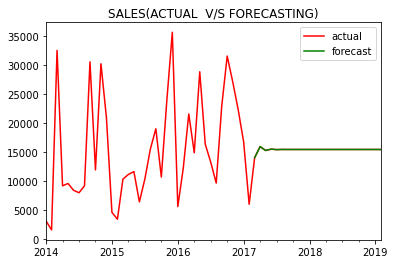

In [97]:
fore5.plot(label="actual",c='r')
d5.plot(label="forecast",c='g')
plt.title("SALES(ACTUAL  V/S FORECASTING)")
plt.legend();

### FOR PROFIT:

In [98]:
df_t=df[df['Category']=='Technology'].loc[:,['Profit']]
df_t.head()
df1_t=df_t.resample("MS").sum()

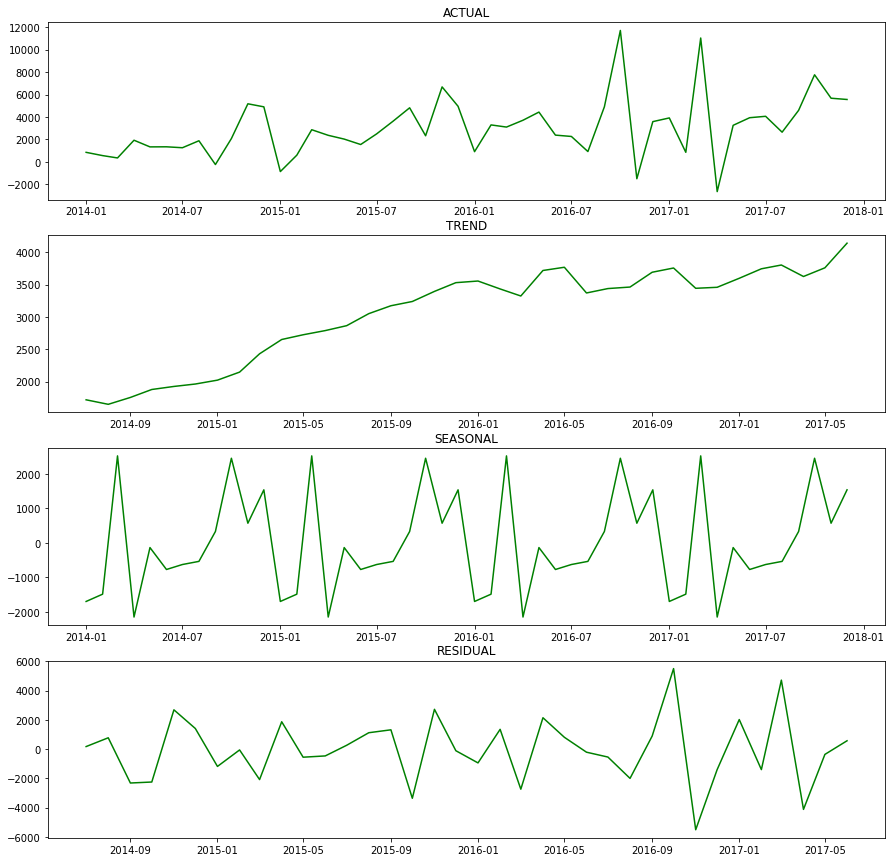

In [99]:
dec=seasonal_decompose(df1_t,period=12)
dec_trend=dec.trend
dec_ses=dec.seasonal
dec_res=dec.resid
fig,ax=plt.subplots(4,1,figsize=(15,15))
graph=['ACTUAL','TREND','SEASONAL','RESIDUAL']
for i,(j,ax) in enumerate(zip([df1_t,dec_trend,dec_ses,dec_res],ax.flatten())):
    ax.plot(j,c='g')
    ax.set_title(graph[i])

In [100]:
check(df1_t)

DATA IS STATIONARY : P_VALUE IS ======1.7544917896675532e-10 


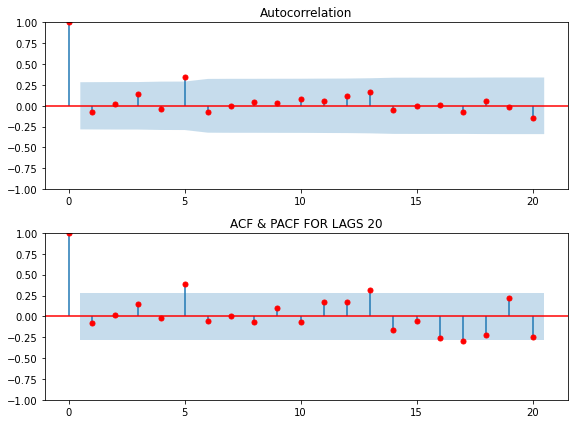

In [101]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df1_t, lags=20, ax=ax1,c='r')
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df1_t, lags=20, ax=ax2,c='r')
plt.tight_layout()
plt.title("ACF & PACF FOR LAGS 20");

### ARMA MODEL( AS DATA IS STATIONARY)

In [102]:
data= int(0.8 * len(df1_t))
train5 = df1_t.iloc[:data]
test5 = df1_t.iloc[data:]
print("train === {}, test === {}".format(len(train5), len(test5)))

train === 38, test === 10


In [103]:
for p in range(1,6):
    for q in range(1,2):
            armaf5 = ARIMA(train5,order=(p,0,q))
            armaf_fit5 = armaf5.fit()
            print(p,0,q,'====',armaf_fit5.aic)

1 0 1 ==== 703.2183216886401
2 0 1 ==== 704.7584081584737
3 0 1 ==== 706.2390110501325
4 0 1 ==== 708.2832336487091
5 0 1 ==== 708.17925890739


##### ARMA (1,0,1) is showing least AIC value.

In [104]:
arma_f5 = ARIMA(train5,order=(1,0,1))
arma_f_fit5 = arma_f5.fit()
print(arma_f_fit5.aic)

703.2183216886401


In [105]:
p_value(arma_f_fit5)

[0.61471336]
ACCEPT HO: GOOD MODEL


In [106]:
pred5=arma_f_fit5.predict(0,len(test5)-1)
print(pred5)

Order Date
2014-01-01    2621.440054
2014-02-01    2429.405219
2014-03-01    2544.994709
2014-04-01    2401.083571
2014-05-01    2726.175925
2014-06-01    2349.998104
2014-07-01    2684.312154
2014-08-01    2366.538746
2014-09-01    2743.332736
2014-10-01    2079.552162
Freq: MS, Name: predicted_mean, dtype: float64


In [107]:
actual=[]
predict=[]
for i in range(len(pred5)):
    actual.append(test5['Profit'][i])
    predict.append(pred5[i])
df_fu5=pd.DataFrame({"ACTUAL":actual,"PREDICTED":predict})
df_fu5['error']=df_fu5.ACTUAL-df_fu5.PREDICTED
print(df_fu5.head())

       ACTUAL    PREDICTED        error
0  11035.0759  2621.440054  8413.635846
1  -2639.7739  2429.405219 -5069.179119
2   3261.7397  2544.994709   716.744991
3   3939.3580  2401.083571  1538.274429
4   4064.7123  2726.175925  1338.536375


In [108]:
mse6 = mean_squared_error(df_fu5.ACTUAL, df_fu5.PREDICTED)
print("MSE: ",mse6)
rmse6 = mean_squared_error(df_fu5.ACTUAL, df_fu5.PREDICTED,squared=False)
print("Rmse:",rmse6)

MSE:  15472771.114606375
Rmse: 3933.5443450667203


In [109]:
f5=train3['Profit'][:].resample('MS').sum()
d5=arma_f_fit5.forecast(24)
fore5=pd.concat([f5,d5],axis=0)
fore5

2014-01-01     788.950600
2014-02-01     176.091000
2014-03-01    1270.413300
2014-04-01    1000.208600
2014-05-01    1747.204400
                 ...     
2018-10-01    2617.365990
2018-11-01    2624.529336
2018-12-01    2619.097515
2019-01-01    2623.216355
2019-02-01    2620.093121
Freq: MS, Length: 62, dtype: float64

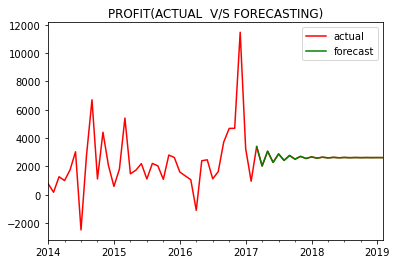

In [110]:
fore5.plot(label="actual",c='r')
d5.plot(label="forecast",c='g')
plt.title("PROFIT(ACTUAL  V/S FORECASTING)")
plt.legend();

### INTERPRETATION:

In [111]:
l1=['Category','MSE','RMSE','AIC']
l2=['Furniture',mse1,rmse1,'801.51']
l3=['Office Supply',mse3,rmse3,'501.55']
l4=['Technology',mse5,rmse5,'809.07']
DATAFRAME_S=pd.DataFrame([l2,l3,l4],columns=l1)
DATAFRAME_S

,Category,MSE,RMSE,AIC
0,Furniture,1.138820e+08,10671.550355,801.51
1,Office Supply,1.615742e+08,12711.184927,501.55
2,Technology,2.174437e+08,14745.971080,809.07


In [112]:
l1=['Category','MSE','RMSE','AIC']
l5=['Furniture',mse2,rmse2,'638.99']
l6=['Office Supply',mse4,rmse4,'699.58']
l7=['Technology',mse6,rmse6,'703.21']
DATAFRAME_P=pd.DataFrame([l5,l6,l7],columns=l1)
DATAFRAME_P

,Category,MSE,RMSE,AIC
0,Furniture,1.354054e+06,1163.638094,638.99
1,Office Supply,3.299341e+06,1816.408854,699.58
2,Technology,1.547277e+07,3933.544345,703.21


### INTERPRETATION:
- COMPANY SHOULD FOCUS ON TECHNOLOGY CATEGORY AS IT IS CONTRIBUTING HIGHEST IN SALES AND PROFIT.
- DISCOUNT SHOULD BE KEPT AS 0-20% AS IT IS CONTRIBUTING MORE FOR PROFIT. 
- ALTHOUGH OFFICE SUPPLIES HAVE HIGHEST PROPORTION OF 60%, BUT TECHNOLOGY AND FURNITURE IS CONTRIBUTING MUCH MORE FOR SALES & PROFIT .SO COMPANY SHOULD FOCUS MORE ON TECHNOLOGY & FURNITURE.
- FOR NEXT 24 MONTHS PROFIT IS LYING MOSTLY IN 0-1000 RANGE.
- FOR NEXT 24 MONTHS SALES ARE LYING IN 0-15000 RANGE